<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Republican vs. Democrat Subbreddit Post Analysis

## Problem Statement

In this era of hyper-partisanship it can be difficult to identify the "news worthiness" of the news.  The responsibility to validate the information we consume falls to the consumer.  This process is difficult when the population is bombarded with a 24/7 news cycle that peddles editorials as news, and chooses what to report and how to report it based on which narritive it supports.  

To this end two political subreddits were chosen, based on their subscriber count and content type, with the goal of producing an algorithm that can determine the source of a post and thus determine its political bias.  The 'democrats' subreddit was chosen to represent the liberal bias and has 435,000 subscribers with news articles accounting for the bulk of the posts.  The 'Republican' subreddit was chosen for the conservative bias and has 189,000 subscibers with posts containing primarily news articles.  

## 1.  Data Cleaning and EDA

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [4]:
# Read in data scraped from Reddit

dvr = pd.read_csv('./datasets/rep_vs_dem.csv')
dvr.head()

,Unnamed: 0,title,domain,author,upvote_ratio,id,created_utc,subreddit
0,0,"Taylor Swift could save Joe Biden in 2024. No,...",msnbc.com,Gamecat93,0.92,18y4ejv,Wed Jan 3 20:38:17 2024,democrats
1,1,The Polls Prove It: Many Republicans Love Fascism,newrepublic.com,audiomuse1,0.93,18y3f93,Wed Jan 3 19:48:29 2024,democrats
2,2,A Far-Right Court Just Admitted a Truth That A...,slate.com,wenchette,0.97,18xxec5,Wed Jan 3 15:19:27 2024,democrats
3,3,Trump Asks Supreme Court to Keep Him on Colora...,nytimes.com,StandStillLaddie,0.92,18xw4gq,Wed Jan 3 14:28:20 2024,democrats
4,4,"Donald Trump ""missing"" from Nevada ballot enra...",newsweek.com,vincevega87,0.98,18y80vn,Thu Jan 4 00:13:25 2024,democrats


In [25]:
# Get dataframe information

dvr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1475 non-null   object 
 1   domain        1475 non-null   object 
 2   author        1475 non-null   object 
 3   upvote_ratio  1475 non-null   float64
 4   id            1475 non-null   object 
 5   created_utc   1475 non-null   object 
 6   subreddit     1475 non-null   object 
 7   hour          1475 non-null   object 
dtypes: float64(1), object(7)
memory usage: 92.3+ KB


In [5]:
# Get total post count from webscrapes

dvr.shape

(1475, 8)

In [9]:
# Drop unnecessary column 'Unnamed: 0'

dvr.drop(columns = 'Unnamed: 0', inplace = True)
dvr.shape

(1475, 7)

In [10]:
# Check for nulls in data

dvr.isnull().sum()

title           0
domain          0
author          0
upvote_ratio    0
id              0
created_utc     0
subreddit       0
dtype: int64

In [9]:
# Verify duplicate rows have been dropped

dvr['id'].value_counts().sort_values(ascending = False)

id
18y4ejv    1
18xmjxr    1
18xxec5    1
18xw4gq    1
18y80vn    1
          ..
190gr5s    1
190ag8l    1
190051h    1
190d1bh    1
18zpxgp    1
Name: count, Length: 1475, dtype: int64

In [10]:
# Verify data has been read in properly to the last post

dvr.tail()

,title,domain,author,upvote_ratio,id,created_utc,subreddit
1470,Federal court rules even passive Jan. 6 protes...,hodastoresaudi.com,PsychologicalBell516,0.58,1905wjl,Sat Jan 6 10:04:26 2024,Republican
1471,TikTok · Matt The Welder,tiktok.com,RealMattTheWelder,0.60,190gr5s,Sat Jan 6 18:02:03 2024,Republican
1472,TikTok · Matt The Welder,tiktok.com,RealMattTheWelder,0.57,190ag8l,Sat Jan 6 13:18:19 2024,Republican
1473,Ex-AOC aide lined pockets with nearly $140K fr...,hodastoresaudi.com,PsychologicalBell516,0.68,190051h,Sat Jan 6 05:36:43 2024,Republican
1474,Lies versus Reality,i.redd.it,therealmaxxc,0.82,18zpxgp,Fri Jan 5 19:11:54 2024,Republican


In [11]:
# identify number of posts per subreddit

dvr['subreddit'].value_counts()

subreddit
Republican    758
democrats     717
Name: count, dtype: int64

In [19]:
# Calculate top 50 posters with subreddit affiliation 

dvr_gb1 = dvr.groupby(['subreddit', 'author'])['author'].count().sort_values(ascending = False)
print(dvr_gb1)
len(dvr_gb1)

subreddit   author              
Republican  intelligentreviews      510
democrats   audiomuse1               46
Republican  PsychologicalBell516     43
            StedeBonnet1             40
democrats   CuPride                  37
                                   ... 
Republican  dr_perron                 1
            donutloop                 1
democrats   RealKlytus                1
            Real_World123             1
            zygorax                   1
Name: author, Length: 253, dtype: int64


253

#### Observation
User 'intelligentreviews' is an outlier with 10x the posts as the next user.  Further research concluded that this is a legitimate account created 3 years ago posting to mainly conservative subreddits.  

In [13]:
# Find number of unique users per subreddit

print(f"Unique Dem Posters: {len(dvr.loc[dvr['subreddit'] == 'democrats', 'author'].value_counts())}")
print(f"Unique Rep Posters: {len(dvr.loc[dvr['subreddit'] == 'Republican', 'author'].value_counts())}")

Unique Dem Posters: 188
Unique Rep Posters: 65


#### Observation
Despite having 1/3 the number of unique posters, the Republican subreddit has a higher number of posts.  This is due to the the super-poster 'intelligentreviews'.  There are 251 unique posters but the user breakdown by subreddit yields 253 posters so there are two users posting to both subreddits.

In [21]:
# Calculate top 50 'news' sources with subreddit affiliation 

dvr_gb2 = dvr.groupby(['subreddit', 'domain'])['domain'].count().sort_values(ascending = False)
print(dvr_gb2)
len(dvr_gb2)

subreddit   domain            
democrats   i.redd.it             107
Republican  breitbart.com          91
            dailywire.com          79
            foxnews.com            79
            redstate.com           77
                                 ... 
democrats   floridadems.org         1
            floridaphoenix.com      1
Republican  newdiscourses.com       1
            nbcnews.com             1
            6abc.com                1
Name: domain, Length: 261, dtype: int64


261

#### Observation
Domain 'i.redd.it' is the leading domain.  Further research concluded that this is obviously not a news source but it is Reddits image hosting services.   

In [15]:
# Find number of unique sources per subreddit

print(f"Unique Dem Sources: {len(dvr.loc[dvr['subreddit'] == 'democrats', 'domain'].value_counts())}")
print(f"Unique Rep Sources: {len(dvr.loc[dvr['subreddit'] == 'Republican', 'domain'].value_counts())}")

Unique Dem Sources: 148
Unique Rep Sources: 113


#### Observation
Users on the Republican subreddit utilize fewer sources to post more content. There are 261 unique sources per the above filtering and also 261 unique sources per the breakdown per subreddit seen in the above groupby breakdown.  This illustrates two things, the partisan nature of media and how no one outlet was consumed by both sides, and that a simple list of liberal vs conservative outlets will suffice for partisan identification.

In [16]:
# Explore posts from top source 'i.redd.it'

dvr.loc[dvr['domain'] == 'i.redd.it']

,title,domain,author,upvote_ratio,id,created_utc,subreddit
22,MAGA Republicans will get butthurt over litera...,i.redd.it,gomalley411,0.91,18wrx71,Tue Jan 2 07:25:21 2024,democrats
29,“What are the current predictions for the 2024...,i.redd.it,FrostWingDev,0.85,18x726l,Tue Jan 2 17:47:20 2024,democrats
30,Biden-Harris wins in 2023,i.redd.it,boardgame_goblin,0.95,18wu6om,Tue Jan 2 09:00:56 2024,democrats
32,It does exist,i.redd.it,goatious,0.81,18x6dt3,Tue Jan 2 17:16:36 2024,democrats
37,Real patriots,i.redd.it,emilyblunt2023,0.98,18wgxtg,Mon Jan 1 20:50:38 2024,democrats
...,...,...,...,...,...,...,...
1442,Trump is a traitor,i.redd.it,emilyblunt2023,0.95,190kn5q,Sat Jan 6 21:22:54 2024,democrats
1447,What can I do to help?,i.redd.it,WattsAndThoughts,0.95,1908xet,Sat Jan 6 12:13:00 2024,democrats
1449,Help BidenHQ get more followers and share thei...,i.redd.it,The_Green_Turkey,0.97,190agub,Sat Jan 6 13:19:05 2024,democrats
1450,Traitor Trump!,i.redd.it,emilyblunt2023,0.99,18zxnlv,Sat Jan 6 03:01:33 2024,democrats


#### Observation
'i.redd.it' is Reddit's image hosting service.  These posts are largely image-based with little useful content for this NLP analysis.

In [17]:
# Generate stats on upvote_ratio column

dvr.groupby('subreddit')['upvote_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
Republican,758.0,0.787625,0.099329,0.21,0.74,0.80,0.85,1.0
democrats,717.0,0.951088,0.059153,0.35,0.94,0.97,0.98,1.0


#### Observation
Comparing the avereage 'upvote_ratio' bewtween the two subreddits, it may be inferred that there is a higher level of disagreement in the 'Republican' subreddit compared to the 'democrats' subreddit.

In [11]:
# Extract hour from 'created_utc' column for later analysis

dvr['hour'] = 0
i = 0
for time in dvr['created_utc']:
    dvr['hour'][i] = (((time.split())[3]).split(':')[0])
    i += 1

/var/folders/qy/nr1f_j6j7nx50jtp9tqqgftc0000gn/T/ipykernel_45771/408124558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvr['hour'][i] = (((time.split())[3]).split(':')[0])


In [12]:
dvr.head()

,title,domain,author,upvote_ratio,id,created_utc,subreddit,hour
0,"Taylor Swift could save Joe Biden in 2024. No,...",msnbc.com,Gamecat93,0.92,18y4ejv,Wed Jan 3 20:38:17 2024,democrats,20
1,The Polls Prove It: Many Republicans Love Fascism,newrepublic.com,audiomuse1,0.93,18y3f93,Wed Jan 3 19:48:29 2024,democrats,19
2,A Far-Right Court Just Admitted a Truth That A...,slate.com,wenchette,0.97,18xxec5,Wed Jan 3 15:19:27 2024,democrats,15
3,Trump Asks Supreme Court to Keep Him on Colora...,nytimes.com,StandStillLaddie,0.92,18xw4gq,Wed Jan 3 14:28:20 2024,democrats,14
4,"Donald Trump ""missing"" from Nevada ballot enra...",newsweek.com,vincevega87,0.98,18y80vn,Thu Jan 4 00:13:25 2024,democrats,00


In [13]:
# Create rep and dem subsets for barplot generation

rep = pd.DataFrame(dvr.loc[dvr['subreddit'] == 'Republican','hour'].value_counts().sort_index())
dem = pd.DataFrame(dvr.loc[dvr['subreddit'] == 'democrats','hour'].value_counts().sort_index())

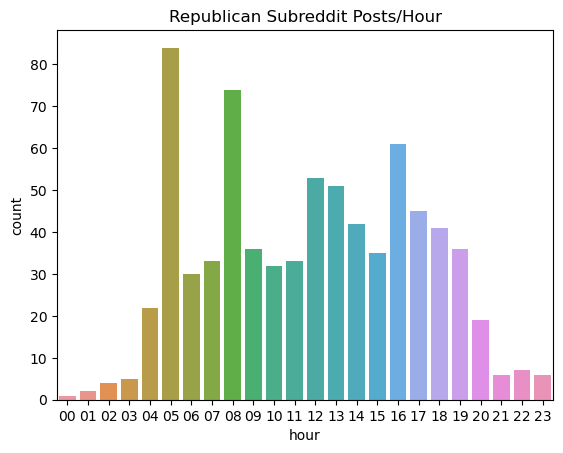

In [15]:
# Generate posts/hour barplot from 'Republican' subreddit

sns.barplot(x = rep.index, y = 'count', data = rep)
plt.title('Republican Subreddit Posts/Hour');

#### Observation
Posts in the 'Republican' subreddit start in earnest in the 0400 hour increasing gradually till 1600 afterwhich it begins to taper off quickly. The spikes at 0500 and 0800 are possibly due to super-poster 'dumps'.

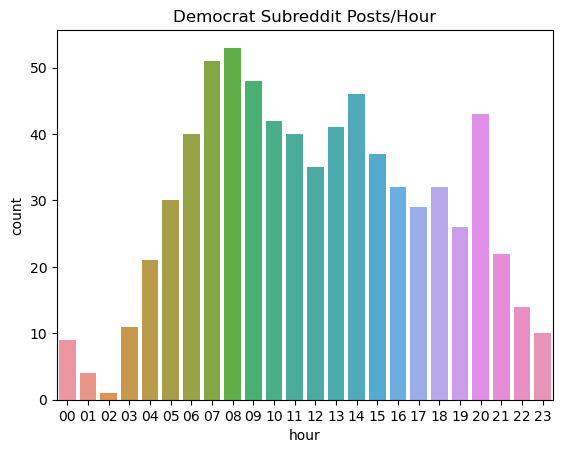

In [16]:
# Generate posts/hour barplot from 'democrats' subreddit

sns.barplot(x = dem.index, y = 'count', data = dem)
plt.title('Democrat Subreddit Posts/Hour');

#### Observation
Posts in the 'democrats' subreddit start in earnest in the 0400 hour increasing quickly till 0800 afterwhich it begins to taper off gradually till night time. After lunch and dinner are popular posting times as demonstrated by the spikes at 1400 and 2000.